In [1]:
!pip install -q ultralytics

In [2]:
import os
import random
random.seed(42)
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def copy_data(images_path, labels_path, destination_path, train_ratio=0.7, random_seed=42):
    # Create new directories for train and val in the destination path
    train_dir = os.path.join(destination_path, 'train')
    val_dir = os.path.join(destination_path, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Create subdirectories for 'images' and 'labels' within 'train' and 'val'
    train_images_dir = os.path.join(train_dir, 'images')
    train_labels_dir = os.path.join(train_dir, 'labels')
    val_images_dir = os.path.join(val_dir, 'images')
    val_labels_dir = os.path.join(val_dir, 'labels')
    os.makedirs(train_images_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_images_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)

    # List all image and label files
    image_files = os.listdir(os.path.join(images_path, 'train'))
    label_files = os.listdir(os.path.join(labels_path, 'train')) 
    
    
    test_size=(1 - train_ratio)
    num_test = int(len(label_files)*test_size)+1
    
    for i in tqdm(range(num_test), desc='Creating validation part'):
        picked = random.choice(image_files)
        img_name = picked
        lbl_name = picked.replace('.jpg', '.txt')
        image_files.remove(img_name)
        label_files.remove(lbl_name)
        shutil.copy2(os.path.join(images_path,'train',img_name), os.path.join(val_images_dir, img_name))
        shutil.copy2(os.path.join(labels_path,'train',lbl_name), os.path.join(val_labels_dir,lbl_name))
#         print(type(img_name))
#         print(lbl_name)

    for f in image_files:
        img_name = f
        lbl_name = f.replace('.jpg','.txt')
        shutil.copy2(os.path.join(images_path,'train',img_name), os.path.join(train_images_dir, img_name))
        shutil.copy2(os.path.join(labels_path,'train',lbl_name), os.path.join(train_labels_dir,lbl_name))
        
#     # Copy images and labels to 'images' and 'labels' folders in train
#     for image_file in tqdm(image_train, desc='Copying train images'):
#         shutil.copy2(os.path.join(images_path, 'train', image_file), os.path.join(train_images_dir, image_file))
#     for label_file in tqdm(label_train, desc='Copying train labels'):
#         shutil.copy2(os.path.join(labels_path, 'train', label_file), os.path.join(train_labels_dir, label_file))

#     # Copy remaining images and labels to 'images' and 'labels' folders in val
#     for image_file in tqdm(image_val, desc='Copying val images'):
#         shutil.copy2(os.path.join(images_path, 'train', image_file), os.path.join(val_images_dir, image_file))
#     for label_file in tqdm(label_val, desc='Copying val labels'):
#         shutil.copy2(os.path.join(labels_path, 'train', label_file), os.path.join(val_labels_dir, label_file))

if __name__ == "__main__":
    # Replace 'path/to/your/images', 'path/to/your/labels', and 'path/to/your/destination' with the actual paths
    images_folder = '/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images'
    labels_folder = '/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels'
    destination_folder = '/kaggle/working/'

    copy_data(images_folder, labels_folder, destination_folder)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Creating validation part: 100%|██████████| 1769/1769 [00:27<00:00, 64.07it/s]


In [4]:
i = [f for f in os.listdir("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train")]
print(len(i))

l = [f for f in os.listdir('/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train')]
print(len(l))
print(len(l)*0.2)

5896
5896
1179.2


In [5]:
l = [f for f in os.listdir('/kaggle/working/train/images')]
print(len(l))

4127


In [6]:
!tree -d

.
|-- train
|   |-- images
|   `-- labels
`-- val
    |-- images
    `-- labels

6 directories


# EDA's

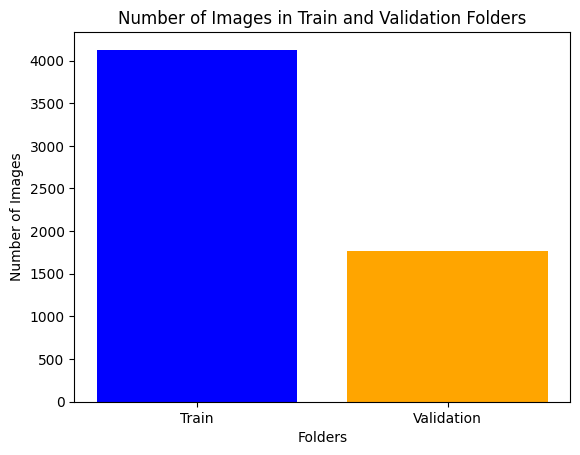

In [7]:
import os
import matplotlib.pyplot as plt

# Define the paths to the image folders
train_path = "/kaggle/working/train/images"
val_path = "/kaggle/working/val/images"

# Function to count the number of images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count the number of images in each folder
train_images_count = count_images(train_path)
val_images_count = count_images(val_path)

# Bar plot
folders = ['Train', 'Validation']
image_counts = [train_images_count, val_images_count]

plt.bar(folders, image_counts, color=['blue', 'orange'])
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train and Validation Folders')
plt.show()


[{'class_id': 3, 'center_x': 0.3549479166666667, 'center_y': 0.7148148148148148, 'center_width': 0.09947916666666666, 'center_height': 0.15}, {'class_id': 11, 'center_x': 0.42265625, 'center_y': 0.6236111111111111, 'center_width': 0.034895833333333334, 'center_height': 0.0824074074074074}]


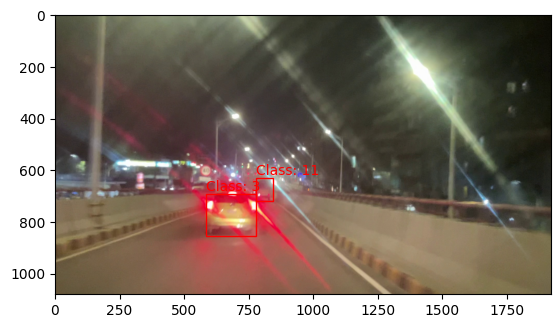

In [8]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def read_labels(label_file_path):
    with open(label_file_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        confidence_score = float(parts[1])
        center_x, center_y, center_width, center_height = map(float, parts[1:])
        annotations.append({'class_id': class_id,
                            'center_x': center_x, 'center_y': center_y,
                            'center_width': center_width, 'center_height': center_height})

    return annotations

def get_bounding_box_coordinates(image_width, image_height, x_center, y_center, width, height):
    # Calculate the coordinates of the bounding box
    x_center_pixel = x_center * image_width
    y_center_pixel = y_center * image_height
    half_width = width * image_width / 2
    half_height = height * image_height / 2

    # Calculate the coordinates of the bounding box
    xmin = int(x_center_pixel - half_width)
    ymin = int(y_center_pixel - half_height)
    xmax = int(x_center_pixel + half_width)
    ymax = int(y_center_pixel + half_height)

    return xmin, ymin, xmax, ymax

def plot_image_with_boxes(image_path, labels):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for label in labels:
        class_id = label['class_id']
        center_x, center_y, center_width, center_height = label['center_x'], label['center_y'], label['center_width'], label['center_height']

        # Calculate bounding box using center coordinates
        xmin, ymin, xmax, ymax = get_bounding_box_coordinates(image.shape[1], image.shape[0], center_x, center_y, center_width, center_height)

        rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'Class: {class_id}', color='r', verticalalignment='bottom')

    plt.show()

# Example usage to choose a random image and its label
label_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train"
image_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train"

# Get a list of all label files
label_files = [file for file in os.listdir(label_folder) if file.endswith('.txt')]

# Choose a random label file
random_label_file = random.choice(label_files)

# Form the paths for the image and label
image_file = random_label_file.replace('.txt', '.jpg')
image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, random_label_file)

# Read labels and plot the image with bounding boxes
labels = read_labels(label_path)
print(labels)
plot_image_with_boxes(image_path, labels)


In [9]:
def read_labels(label_file_path):
    with open(label_file_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        parts = line.strip().split()
#         return parts
        if len(parts) < 5:
            # Handle cases where there might be fewer values in a line
            print(f"Skipping line with insufficient values: {line}")
            continue

        class_id = int(parts[0])
#         return class_id
        x1 = float(parts[1])
        y1 = float(parts[2])
        width=float(parts[3])
        height=float(parts[4])
        annotations.append({'class_id': class_id,
                            'x1': x1, 'y1': y1, 'width': width, 'height': height})

    return annotations

(1080, 1920)


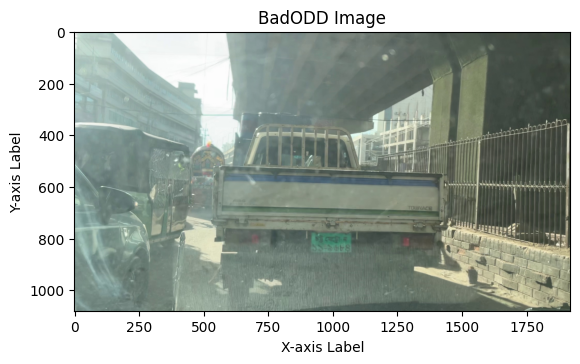

In [10]:
image_path="/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/chittagong_bohoddarhat1_10030.jpg"
image=cv2.imread(image_path)
height,width,_=image.shape
print((height,width))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a Matplotlib figure and axes
fig, ax = plt.subplots()

# Display the image with axes
ax.imshow(image_rgb)

# Customize the plot (optional)
ax.set_title('BadODD Image')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')

# Show the plot
plt.show()

In [11]:
import os

# Define the class ID to name mapping
class_id_to_name = {
    0: 'auto_rickshaw',
    1: 'bicycle',
    2: 'bus',
    3: 'car',
    4: 'cart_vehicle',
    5: 'construction_vehicle',
    6: 'motorbike',
    7: 'person',
    8: 'priority_vehicle',
    9: 'three_wheeler',
    10: 'train',
    11: 'truck',
    12: 'wheelchair'
}

# Define the label folder path
label_folder = "/kaggle/working/train/labels"

# Initialize a dictionary to store class counts
class_counts = {class_id: 0 for class_id in class_id_to_name}

# Iterate through each text file in the label folder
for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(label_folder, filename)
        
        # Read the content of the label file and count class occurrences
        with open(file_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            parts = line.strip().split()
            if parts:  # Check if the line is not empty
                class_id = int(parts[0])
                if class_id in class_counts:
                    class_counts[class_id] += 1

# Print the class counts
for class_id, count in class_counts.items():
    class_name = class_id_to_name[class_id]
    print(f'Class {class_id} ({class_name}): {count} instances')


Class 0 (auto_rickshaw): 7442 instances
Class 1 (bicycle): 476 instances
Class 2 (bus): 1302 instances
Class 3 (car): 2636 instances
Class 4 (cart_vehicle): 103 instances
Class 5 (construction_vehicle): 19 instances
Class 6 (motorbike): 2635 instances
Class 7 (person): 12535 instances
Class 8 (priority_vehicle): 154 instances
Class 9 (three_wheeler): 3952 instances
Class 10 (train): 1 instances
Class 11 (truck): 1578 instances
Class 12 (wheelchair): 2 instances


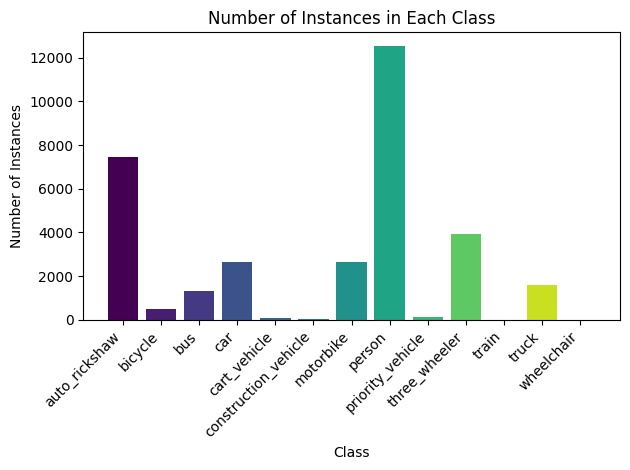

In [12]:
import numpy as np
# Create a bar plot
class_ids = list(class_counts.keys())
# print(class_ids)
class_names = [class_id_to_name[class_id] for class_id in class_ids]
counts = list(class_counts.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(class_ids)))

plt.bar(class_names, counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Class')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Handling Class Imbalance

In [13]:
class_counts

{0: 7442,
 1: 476,
 2: 1302,
 3: 2636,
 4: 103,
 5: 19,
 6: 2635,
 7: 12535,
 8: 154,
 9: 3952,
 10: 1,
 11: 1578,
 12: 2}

In [14]:
# os.makedirs('imbalance', exist_ok=True)

# imb = []

# for key, value in class_counts.items():
#     if value < 600:
#         imb.append(key)
        
# os.path.join('imbalance','image')
# os.path.join('imbalance', 'label')

# label_folder = "/kaggle/working/train/labels"

# imb_files={k:[] for k in imb}

# for filename in os.listdir(label_folder):
#     if filename.endswith(".txt"):
#         file_path = os.path.join(label_folder, filename)
        
#         # Read the content of the label file and count class occurrences
#         with open(file_path, 'r') as file:
#             lines = file.readlines()

#         for line in lines:
#             parts = line.strip().split()
#             if parts:  # Check if the line is not empty
#                 class_id = int(parts[0])
#                 if class_id in imb:
#                     imb_files[class_id].append(file_path)

# for key, file_list in imb_files.items():
#     for f in file_list:
#         src_l = f
#         src_i = src_l.replace('label', 'image')
#         src_i = src_i.replace('.txt', '.jpg')
        
#         des_l = f.replace('train', 'imbalance')
#         des_i = des_l.replace('label', 'image')
#         i = i.replace('.txt', '.jpg')
        
#         print(l)
#         print(i)
#         break
    
# [class_id_to_name[k]+" : "+str(len(imb_files[k])) for k in imb_files.keys()]

# Visualizing

/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/chittagong_bohoddarhat1_2124.jpg /kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train/chittagong_bohoddarhat1_2124.txt
(1080, 1920, 3)


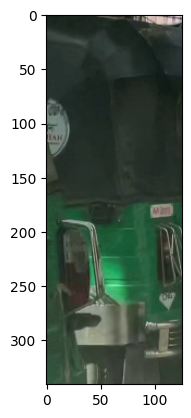

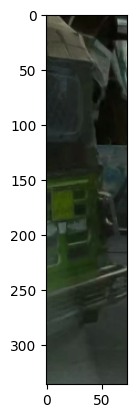

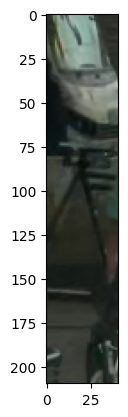

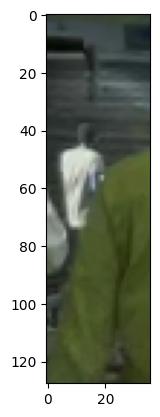

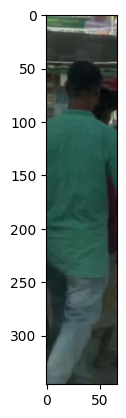

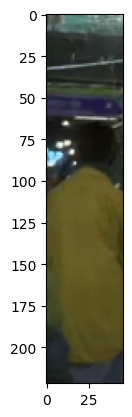

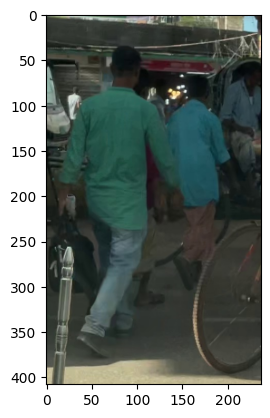

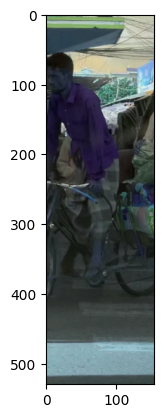

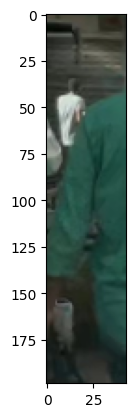

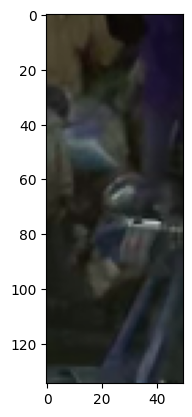

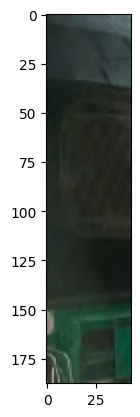

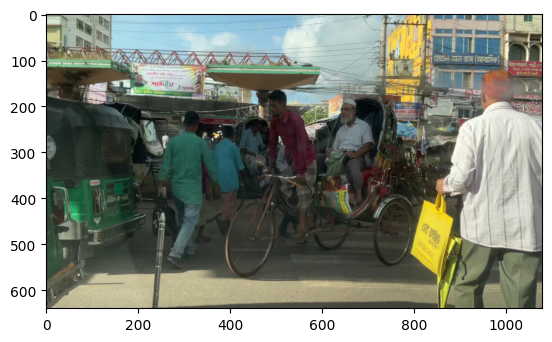

In [15]:
import cv2
#Load the predicted test image
# Example usage to choose a random image and its label
label_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train"
image_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train"

# Get a list of all label files
label_files = [file for file in os.listdir(label_folder) if file.endswith('.txt')]

# Choose a random label file
random_label_file = random.choice(label_files)

# Form the paths for the image and label
image_file = random_label_file.replace('.txt', '.jpg')
image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, random_label_file)
print(image_path,label_path)


image_path = image_path
image = cv2.imread(image_path)
print(image.shape)
# Specify the path to the text file prediction ([label, x_center, y_center, width, height])
txt_file_path = label_path
with open(txt_file_path, 'r') as file:
    lines=file.readlines()
for i, line in enumerate(lines):
#Split the line into its components
    parts=line.split()
    if len(parts) == 5:
        class_id, center_x, center_y, width, height = map(float, parts)
        #yolov7 was training with image size of 640x640
#         print(width,height)
        img_width = 640
        img_height = 640
        xmin, ymin, xmax, ymax = get_bounding_box_coordinates(img_width, img_height,center_x, center_y, width, height) #function call
        #Crop the image to extract the bounding box region
        image = cv2.resize(image, (1080, 640))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cropped_region = image [ymin:ymax, xmin:xmax]
        # Display the cropped region
        plt.imshow(cropped_region)
        plt.show()
        plt.imshow(image)
#         cv2.waitKey(0) # Wait for a key press (in milliseconds) to close the window
# cv2.destroyAllWindows()

# Preprocessing

In [16]:
import albumentations as A
import cv2
from PIL import Image
import random
random.seed(42)
TARGET_HEIGHT = 1080
TARGET_WIDTH = 1920

In [17]:
transform = A.Compose([
    A.Resize(height=TARGET_HEIGHT, width=TARGET_WIDTH), 
    A.GaussianBlur(p=0.3),
    A.MedianBlur(p=0.3),
    A.CLAHE(p=0.2),
    A.HorizontalFlip(p=0.8),
    A.ZoomBlur(max_factor=1.3, step_factor=(0.01, 0.03), always_apply=False, p=0.3),
    A.ColorJitter(
        contrast=0.3,
        saturation=0.7,
        hue=0.015,
        brightness=0.4,
    ),  
    A.RandomBrightnessContrast(contrast_limit=(0.3, 0.3), brightness_limit=(-0.4, -0.4), p=1.),
    A.HueSaturationValue(hue_shift_limit=(1, 1), p=1.),
    A.ToFloat(max_value=255.0),
    A.Normalize (mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=True, p=1.0)
], bbox_params=A.BboxParams(format='coco', label_fields=[]))

In [18]:
def applyaugmentation(train_dir='', transform_pipeline=None):
    if train_dir=='':
        raise ValueError("Path is not given")
    images_path = os.path.join(train_dir, 'images')
    labels_path = os.path.join(train_dir, 'labels')

    label_files = [os.path.join(labels_path,file) for file in os.listdir(labels_path) if file.endswith('.txt')]
    
    for label_path in tqdm(label_files, desc="Applying augmentation"):
        img_path = label_path.replace('labels', 'images').replace('.txt','.jpg')

        np_image = np.array(Image.open(img_path).convert("RGB"))
        # Specify the path to the text file prediction ([label, x_center, y_center, width, height])
        txt_file_path = label_path
        class_labels = []
        boxes = []
        with open(txt_file_path, 'r') as file:
            lines=file.readlines()
        for i, line in enumerate(lines):
        #Split the line into its components
            parts=line.split()
            if len(parts) == 5:
                class_id, center_x, center_y, width, height = map(float, parts)
                class_labels.append(int(class_id))
                boxes.append([center_x,center_y, width, height])
#         print("Class_labels: ", class_labels)
#         print("Boxes: ", boxes)
        # now the applying albugmentation
        if transform_pipeline:
            for i,_ in enumerate(range(3)):

                transform_result = transform_pipeline(image=np_image, bboxes=boxes, class_labels= class_labels)
                basic_transformed_image = transform_result["image"]
                basic_transformed_bboxes = transform_result["bboxes"]
                basic_transformed_labels = transform_result["class_labels"]
                f_name = img_path.split('/')[-1].split('.')[0]
                f_name += f"_{i}"
                i_name = os.path.join('/kaggle/working/train/images', f_name+".jpg")
                l_name = os.path.join('/kaggle/working/train/labels', f_name+'.txt')

                _img = Image.fromarray(basic_transformed_image, 'RGB')
                _img.save(i_name)

                with open(l_name,'a') as file:
                    
                    for l, b in zip(basic_transformed_labels, basic_transformed_bboxes):
                        file.write(str(l))
                        line=''
                        for point in b:
                            line += " "+str(point/640)
                        file.write(line+'\n')
        else:
            raise ValueError("Albugmentor pipeline is not given")

In [19]:
# applyaugmentation("/kaggle/working/train", transform_pipeline=transform)

In [20]:
i = [f for f in os.listdir("/kaggle/working/train/images")]
print(len(i))

l = [f for f in os.listdir('/kaggle/working/train/labels')]
print(len(l))

4127
4127


In [21]:
i = [f for f in os.listdir("/kaggle/working/val/images")]
print(len(i))

l = [f for f in os.listdir('/kaggle/working/val/labels')]
print(len(l))

1769
1769



# YOLO Training

In [22]:
file_content = """
path: /kaggle/working/  # dataset root dir
train: ./train/images  # train images (relative to 'path')
val: ./val/images  # val images (relative to 'path')
test:  /kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test

# Classes
names:
    0: auto_rickshaw
    1: bicycle
    2: bus
    3: car
    4: cart_vehicle
    5: construction_vehicle
    6: motorbike
    7: person
    8: priority_vehicle
    9: three_wheeler
    10: train
    11: truck
    12: wheelchair
"""

with open("data.yaml", mode="w") as f:
    f.write(file_content)

In [23]:
import wandb
# wandb.init(mode="disabled")
wandb.login(key ='a9cd634aa6e8ac711e4a18b073f238ff96672289')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [24]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(data="/kaggle/working/data.yaml", 
            epochs=255,
            deterministic=True,
            seed=42,
            pretrained=True,
            batch=16,
            patience=25,
            val=True,
            device=0,
            cos_lr= True,
            dropout=0.2,
            name='sadhin_exp_3'
           )

100%|██████████| 21.5M/21.5M [00:00<00:00, 204MB/s]


Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=255, time=None, patience=25, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=sadhin_exp_3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]
2024-02-10 12:04:15,546	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-10 12:04:16,054	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

wandb: Currently logged in as: pltops (klshrn). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.2
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240210_120427-i1291xmc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run sadhin_exp_3
wandb: ⭐️ View project at https://wandb.ai/klshrn/YOLOv8
wandb: 🚀 View run at https://wandb.ai/klshrn/YOLOv8/runs/i1291xmc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 4127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4127/4127 [00:03<00:00, 1202.05it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/val/labels... 1769 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1769/1769 [00:01<00:00, 1222.60it/s]

val: New cache created: /kaggle/working/val/labels.cache


Plotting labels to runs/detect/sadhin_exp_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/sadhin_exp_3
Starting training for 255 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/255      4.69G      1.322      1.721       1.14        176        640: 100%|██████████| 258/258 [01:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.69it/s]


                   all       1769      14283       0.78       0.36      0.421       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/255      4.61G      1.251      1.089      1.102        203        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283      0.631      0.406       0.45      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/255      4.61G      1.297      1.088       1.12        310        640: 100%|██████████| 258/258 [01:22<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.75it/s]


                   all       1769      14283      0.561        0.4      0.429      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/255      4.62G      1.348      1.127      1.153        190        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]


                   all       1769      14283      0.656      0.401      0.442      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/255       4.6G      1.346      1.106      1.157        175        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.745      0.364      0.433      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/255      4.61G      1.333       1.07      1.149        210        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.75it/s]


                   all       1769      14283      0.683      0.405      0.461      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/255       4.6G      1.317      1.041       1.14        222        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.623      0.416      0.453      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/255      4.61G      1.304      1.015      1.137        215        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283       0.74      0.415      0.471      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/255       4.6G      1.292     0.9929      1.131        318        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.61it/s]


                   all       1769      14283      0.757      0.432      0.487      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/255      4.61G      1.279     0.9696      1.124        250        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.673      0.462      0.497      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/255      4.59G      1.271     0.9609      1.121        197        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.75it/s]


                   all       1769      14283      0.716      0.464      0.512      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/255      4.61G      1.257      0.942      1.114        208        640: 100%|██████████| 258/258 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.80it/s]


                   all       1769      14283      0.699      0.469      0.519      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/255      4.59G      1.256     0.9278      1.108        249        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.77it/s]


                   all       1769      14283      0.707      0.465      0.523      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/255      4.61G      1.249     0.9201      1.111        210        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.75it/s]


                   all       1769      14283      0.583      0.455      0.512       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/255       4.6G      1.243     0.9066      1.105        199        640: 100%|██████████| 258/258 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.707      0.464      0.517      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/255      4.61G      1.237     0.8918      1.103        277        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.62it/s]


                   all       1769      14283      0.719      0.462       0.53      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/255      4.59G      1.226     0.8772      1.095        220        640: 100%|██████████| 258/258 [01:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.70it/s]


                   all       1769      14283       0.72      0.494      0.556      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/255      4.62G      1.228     0.8702      1.097        183        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.76it/s]


                   all       1769      14283       0.77      0.478      0.538      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/255      4.61G      1.219     0.8656      1.092        281        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.72it/s]


                   all       1769      14283      0.743      0.493      0.554      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/255      4.61G      1.211      0.854      1.088        219        640: 100%|██████████| 258/258 [01:22<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.76it/s]


                   all       1769      14283      0.737      0.482      0.539      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/255      4.61G      1.202     0.8472      1.086        182        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.74it/s]


                   all       1769      14283      0.727      0.503      0.549       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/255      4.62G        1.2     0.8282      1.078        182        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.717      0.503      0.551      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/255      4.59G      1.196     0.8327       1.08        237        640: 100%|██████████| 258/258 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.722       0.53      0.574      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/255      4.61G       1.18     0.8095      1.075        184        640: 100%|██████████| 258/258 [01:22<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.723      0.497      0.558      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/255      4.59G      1.187     0.8228      1.077        280        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.80it/s]


                   all       1769      14283      0.773      0.505      0.573      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/255       4.6G      1.178     0.8065      1.073        128        640: 100%|██████████| 258/258 [01:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.76it/s]


                   all       1769      14283      0.764       0.52      0.578      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/255       4.6G      1.175     0.7986      1.069        136        640: 100%|██████████| 258/258 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.733      0.517      0.571      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/255      4.59G      1.169     0.8043      1.068        237        640: 100%|██████████| 258/258 [01:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.63it/s]


                   all       1769      14283      0.731      0.517      0.568      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/255      4.61G      1.169     0.7923      1.067        237        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.72it/s]


                   all       1769      14283      0.762       0.52      0.579      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/255       4.6G      1.166     0.7865      1.065        211        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.76it/s]


                   all       1769      14283      0.768      0.524      0.584      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/255      4.59G      1.168     0.7822      1.067        183        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.78it/s]


                   all       1769      14283      0.775      0.519      0.585      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/255      4.61G      1.158     0.7713       1.06        223        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.80it/s]


                   all       1769      14283      0.797      0.516       0.59       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/255       4.6G      1.152     0.7712      1.057        277        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.80it/s]


                   all       1769      14283       0.74       0.53      0.587      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/255      4.61G      1.154     0.7708       1.06        279        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.67it/s]


                   all       1769      14283       0.76      0.536      0.596      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/255       4.6G      1.148     0.7558      1.054        247        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.67it/s]


                   all       1769      14283      0.812      0.524      0.596      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/255       4.6G      1.145     0.7593      1.052        248        640: 100%|██████████| 258/258 [01:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.63it/s]


                   all       1769      14283      0.816      0.503       0.59      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/255      4.59G      1.144     0.7522      1.052        237        640: 100%|██████████| 258/258 [01:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.66it/s]


                   all       1769      14283      0.783      0.533      0.594      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/255      4.61G       1.14     0.7496      1.054        204        640: 100%|██████████| 258/258 [01:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.785      0.518      0.592      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/255      4.59G      1.131     0.7434      1.049        280        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.81it/s]


                   all       1769      14283      0.803      0.524        0.6      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/255       4.6G      1.125     0.7307      1.045        241        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.785      0.527      0.597      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/255      4.61G      1.123     0.7308      1.044        215        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.79it/s]


                   all       1769      14283      0.761      0.536      0.592      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/255       4.6G      1.124     0.7276      1.043        251        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.81it/s]


                   all       1769      14283       0.77      0.528      0.591      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/255      4.59G      1.118     0.7248      1.044        226        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:22<00:00,  2.52it/s]


                   all       1769      14283      0.748      0.539      0.595      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/255      4.59G       1.12     0.7248      1.041        208        640: 100%|██████████| 258/258 [01:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.74it/s]


                   all       1769      14283       0.77      0.539      0.606      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/255      4.59G      1.119     0.7177      1.039        144        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.723      0.551      0.582      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/255      4.61G       1.11     0.7164      1.038        188        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.709      0.529        0.6      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/255      4.59G       1.11     0.7099      1.034        291        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.78it/s]


                   all       1769      14283      0.752      0.549      0.598      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/255       4.6G      1.105      0.709      1.034        185        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.70it/s]


                   all       1769      14283      0.774      0.519      0.601      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/255       4.6G      1.102     0.7038      1.036        177        640: 100%|██████████| 258/258 [01:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.62it/s]


                   all       1769      14283      0.792      0.525      0.606      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/255      4.61G      1.103     0.7074      1.033        204        640: 100%|██████████| 258/258 [01:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.68it/s]


                   all       1769      14283      0.756      0.531      0.598       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/255      4.59G      1.098     0.6949       1.03        215        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.64it/s]


                   all       1769      14283      0.758      0.562       0.61      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/255       4.6G      1.099     0.6964      1.031        175        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.64it/s]


                   all       1769      14283      0.768      0.538      0.601      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/255      4.61G      1.089     0.6923      1.028        202        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.74it/s]


                   all       1769      14283      0.763      0.536      0.603      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/255       4.6G      1.085     0.6891      1.027        248        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.65it/s]


                   all       1769      14283      0.777      0.541       0.61      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/255      4.61G      1.087     0.6893      1.024        248        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283       0.79      0.523      0.607      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/255       4.6G      1.082     0.6798      1.025        246        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.72it/s]


                   all       1769      14283      0.818      0.533      0.619      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/255       4.6G      1.075     0.6765      1.024        205        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.68it/s]


                   all       1769      14283      0.812      0.535      0.613      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/255      4.61G      1.072     0.6759      1.019        201        640: 100%|██████████| 258/258 [01:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.65it/s]


                   all       1769      14283      0.673      0.595      0.631      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/255      4.61G      1.072     0.6724      1.021        247        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.788      0.544      0.613      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/255       4.6G      1.066     0.6665      1.015        185        640: 100%|██████████| 258/258 [01:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.71it/s]


                   all       1769      14283      0.774       0.54      0.609      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/255      4.59G      1.073     0.6708      1.016        216        640: 100%|██████████| 258/258 [01:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.66it/s]


                   all       1769      14283      0.786      0.536      0.608       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/255       4.6G      1.057     0.6594      1.009        182        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.781      0.563      0.618      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/255       4.6G      1.059     0.6638      1.017        161        640: 100%|██████████| 258/258 [01:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.71it/s]


                   all       1769      14283      0.771      0.557      0.606      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/255       4.6G      1.058      0.657      1.014        181        640: 100%|██████████| 258/258 [01:24<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.809      0.537      0.616      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/255      4.59G      1.056     0.6524      1.008        215        640: 100%|██████████| 258/258 [01:25<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.75it/s]


                   all       1769      14283      0.811      0.548      0.621      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/255      4.59G      1.057     0.6568      1.013        211        640: 100%|██████████| 258/258 [01:24<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.803      0.551      0.622      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/255      4.59G      1.051     0.6502      1.009        260        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.73it/s]


                   all       1769      14283      0.789      0.565      0.625        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/255       4.6G      1.051     0.6519      1.005        146        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283       0.78       0.56      0.618      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/255      4.61G      1.044     0.6477      1.005        166        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.71it/s]


                   all       1769      14283      0.702      0.551       0.62      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/255       4.6G       1.04     0.6452      1.005        261        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.761      0.567      0.623      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/255      4.59G      1.048     0.6444      1.005        281        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283       0.81      0.537      0.615      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/255       4.6G      1.044     0.6379      1.003        231        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.803      0.565      0.641      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/255       4.6G      1.028     0.6308     0.9987        212        640: 100%|██████████| 258/258 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.80it/s]


                   all       1769      14283      0.603      0.605      0.621      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/255      4.61G      1.028     0.6278     0.9986        324        640: 100%|██████████| 258/258 [01:22<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.69it/s]


                   all       1769      14283      0.688       0.56      0.627      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/255       4.6G       1.03     0.6298      1.003        212        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.86it/s]


                   all       1769      14283      0.763      0.569      0.635      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/255      4.61G      1.026     0.6226     0.9973        219        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.60it/s]


                   all       1769      14283      0.697      0.552      0.629      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/255      4.61G      1.014      0.624     0.9927        246        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.86it/s]


                   all       1769      14283      0.731      0.589      0.642      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/255      4.61G      1.018     0.6212     0.9955        145        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.60it/s]


                   all       1769      14283      0.803      0.548      0.669      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/255       4.6G      1.029     0.6268     0.9973        268        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283      0.789      0.561      0.645      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/255      4.59G      1.011     0.6099      0.993        247        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.776      0.566      0.631      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/255       4.6G      1.016     0.6214     0.9928        212        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.795      0.573      0.638      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/255      4.59G      1.011     0.6171     0.9902        159        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.814      0.569      0.633      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/255      4.59G      1.012     0.6145     0.9907        265        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.798       0.56       0.63      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/255      4.59G      1.005     0.6084      0.988        166        640: 100%|██████████| 258/258 [01:24<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.87it/s]


                   all       1769      14283      0.776      0.552      0.619      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/255      4.61G      1.006     0.6097     0.9877        219        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.68it/s]


                   all       1769      14283      0.786      0.573      0.629      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/255      4.61G      1.004     0.6046     0.9857        239        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283      0.694      0.578      0.626      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/255       4.6G     0.9946     0.5987     0.9846        166        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.63it/s]


                   all       1769      14283      0.784      0.574      0.626      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/255      4.59G     0.9913     0.6007     0.9838        280        640: 100%|██████████| 258/258 [01:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.699      0.563      0.642      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/255      4.59G     0.9904     0.5949     0.9828        275        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.62it/s]


                   all       1769      14283      0.705      0.581      0.644      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/255       4.6G     0.9923     0.5976     0.9848        209        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]


                   all       1769      14283      0.704      0.568      0.635      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/255       4.6G     0.9891     0.5942     0.9834        164        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.60it/s]


                   all       1769      14283      0.807      0.566      0.647      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/255      4.61G     0.9851     0.5872     0.9814        226        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]


                   all       1769      14283      0.696      0.628      0.651      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/255      4.58G     0.9872     0.5891     0.9803        254        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.67it/s]


                   all       1769      14283      0.826      0.549      0.633      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/255      4.61G     0.9841     0.5897     0.9758        197        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]


                   all       1769      14283      0.705      0.558      0.634       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/255       4.6G     0.9763     0.5836     0.9782        134        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.67it/s]


                   all       1769      14283      0.786      0.568      0.632      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/255       4.6G     0.9717     0.5835     0.9781        127        640: 100%|██████████| 258/258 [01:26<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.77it/s]


                   all       1769      14283      0.768      0.586      0.645      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/255       4.6G     0.9722     0.5793     0.9776        275        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:20<00:00,  2.67it/s]


                   all       1769      14283      0.777      0.599      0.648      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/255      4.61G     0.9698      0.579     0.9746        181        640: 100%|██████████| 258/258 [01:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]


                   all       1769      14283      0.724      0.603      0.637      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/255       4.6G     0.9742     0.5817     0.9757        166        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.63it/s]


                   all       1769      14283      0.795      0.586      0.656       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/255      4.61G     0.9613      0.576     0.9732        214        640: 100%|██████████| 258/258 [01:23<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]


                   all       1769      14283      0.785      0.576      0.655      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/255       4.6G     0.9673     0.5748     0.9711        337        640: 100%|██████████| 258/258 [01:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.65it/s]


                   all       1769      14283      0.797      0.579      0.657      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/255       4.6G     0.9598     0.5743     0.9729        272        640: 100%|██████████| 258/258 [01:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.87it/s]


                   all       1769      14283      0.749      0.599      0.656       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/255       4.6G      0.951     0.5652     0.9688        270        640: 100%|██████████| 258/258 [01:24<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:21<00:00,  2.62it/s]


                   all       1769      14283      0.781      0.596      0.657      0.421
Stopping training early as no improvement observed in last 25 epochs. Best results observed at epoch 78, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

103 epochs completed in 3.043 hours.
Optimizer stripped from runs/detect/sadhin_exp_3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/sadhin_exp_3/weights/best.pt, 22.5MB

Validating runs/detect/sadhin_exp_3/weights/best.pt...
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:25<00:00,  2.16it/s]


                   all       1769      14283      0.804      0.547      0.669       0.42
         auto_rickshaw       1769       3172      0.879      0.814      0.881      0.641
               bicycle       1769        197      0.803      0.476       0.61      0.311
                   bus       1769        583      0.762      0.616      0.705      0.454
                   car       1769       1149       0.85      0.678      0.769      0.527
          cart_vehicle       1769         38      0.421      0.237      0.286      0.157
  construction_vehicle       1769          4          1          0      0.451      0.179
             motorbike       1769       1114      0.861      0.658      0.733      0.392
                person       1769       5475      0.845        0.6      0.711      0.405
      priority_vehicle       1769         75      0.761      0.594      0.663      0.489
         three_wheeler       1769       1758      0.873      0.759      0.847      0.597
                 truc

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁██████████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄
wandb:                  lr/pg1 ▁██████████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄
wandb:                  lr/pg2 ▁██████████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄
wandb:        metrics/mAP50(B) ▁▁▂▂▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▆▆▇▇▆▇▇▇▇▇▇▇▇▇▇██
wandb:     metrics/mAP50-95(B) ▁▁▂▂▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█▇▇▇▇█▇███
wandb:    metrics/precision(B) ▇▁▄▆▅▂▅▆▆▅▆▇██▇▇▇▅▇▆▇▇▄▇▇█▅█▅▅▇█▇▇▅▅▇▇▇█
wandb:       metrics/recall(B) ▁▂▂▂▄▃▄▄▅▅▅▅▅▅▆▅▅▆▅▅▆▅▇▆▆▆▆▆▆▆▆▆▆▇▇█▆▇▇▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇█▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇██▇▇▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:            val/box_loss ▅█▇█▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7941b65451e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

# Prediction

In [25]:
# Directory path ...
test_directory = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test"

# Load the model ...
model = YOLO('/kaggle/working/runs/detect/sadhin_exp_3/weights/best.pt')

In [26]:
# get prediction boxes string according to the submission format ...

def get_prediction_string(boxes, scores, classes):
    pred_strs = []
    for i, score in enumerate(scores):
        single_pred_str = ""
        single_pred_str += str(float(classes[i])) + " " + str(float(score)) + " "
        
        x_center , y_center, width,height = boxes[i]
        x1 = float(x_center) - (float(width) / 2)
        y1 = float(y_center) - (float(height) / 2)
        width = float(width)
        height = float(height)
        #single_pred_str += " ".join(str(float(x)) for x in boxes[i])
        single_pred_str +=  f"{x1} {y1} {width} {height}"
        
        pred_strs.append(single_pred_str)
    ans = ','.join(map(str, pred_strs))
    if len(ans):
        return ans
#     the solution metrics faield in case of a NaN, '' (empty). So, return "0 0 0 0 0 0" for NaN, '' (empty) string
    return "0 0 0 0 0 0"

# get the predcition in id, ImageID, PredictionString_pred foramt ...

def get_prediction_entry(i, filename, boxes, scores, classes):
    return {
        "id": i, # strating from 0 ...
        "ImageID": filename.split('.')[0], # before the extension ...
        "PredictionString_pred": get_prediction_string(boxes, scores, classes)
    }


# do the inference ...

def predict_all_files(test_directory):
    predictions = []
    for i,filename in tqdm(enumerate(os.listdir(test_directory))):
        if filename.endswith(".jpg"):
            filepath = os.path.join(test_directory, filename)
            results = model.predict(source=filepath, conf=0.50, verbose=False)
            boxes = results[0].boxes.xywhn
            scores = results[0].boxes.conf
            classes = results[0].boxes.cls
            prediction = get_prediction_entry(i, filename, boxes, scores, classes)
            predictions.append(prediction)
#             to csv format ...
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv("submission.csv", index=False)

# call the inference function ...
predict_all_files(test_directory)

1964it [01:29, 21.88it/s]


In [27]:
submission_df = pd.read_csv('/kaggle/working/submission.csv')
submission_df

,id,ImageID,PredictionString_pred
0,0,sherpur2_1073,6.0 0.8134800791740417 0.6968191787600517 0.47...
1,1,mymensingh1_0,7.0 0.8656466007232666 0.4250106140971184 0.09...
2,2,mymensingh1_96860,9.0 0.8920773863792419 0.2806580774486065 0.18...
3,3,khulna4_22590,0.0 0.9271777272224426 0.09978151321411133 0.0...
4,4,mymensingh1_106713,0.0 0.9077473878860474 0.16080760955810547 0.0...
...,...,...,...
1959,1959,mymensingh1_90013,0.0 0.9195193648338318 0.4338924214243889 0.13...
1960,1960,chittagong_bohoddarhat2_8673,3.0 0.8559901714324951 0.46546541526913643 0.7...
1961,1961,sylhet1_32475,0.0 0.9305024743080139 0.658447802066803 0.043...
1962,1962,chittagong_night1_12840,3.0 0.7933138608932495 0.22835282236337662 0.6...


In [28]:
submission_df[submission_df['PredictionString_pred'] == "0 0 0 0 0 0"]

,id,ImageID,PredictionString_pred
24,24,dhaka_night3_55224,0 0 0 0 0 0
53,53,dhaka_night3_62127,0 0 0 0 0 0
74,74,maowa_expressway1_472,0 0 0 0 0 0
92,92,maowa_expressway1_295,0 0 0 0 0 0
97,97,sherpur3_8381,0 0 0 0 0 0
...,...,...,...
1893,1893,maowa_expressway2_17995,0 0 0 0 0 0
1894,1894,chittagong_night1_11700,0 0 0 0 0 0
1924,1924,dhaka_night3_40769,0 0 0 0 0 0
1934,1934,maowa_expressway2_36580,0 0 0 0 0 0


In [29]:
# from IPython.display import Image, display

# image_path = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test/dhaka_night3_62127.jpg"
# display(Image(filename=image_path))
